# Preprocessing


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dog_adoption2')
df.shape

(16008, 58)

In [3]:
df['outcome_type'].unique()


array(['Adoption'], dtype=object)

In [4]:
df.head()

,Unnamed: 0,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,intake_condition,intake_type,sex_upon_outcome,...,color_Brown,color_Brown Brindle,color_Buff,color_Gray,color_Red,color_Sable,color_Tan,color_Tricolor,color_White,color_Yellow
0,12,Adoption,A200922,16.0,2013-11-22 09:44:00,2013-11,Dog,Normal,Owner Surrender,Neutered Male,...,0,0,0,0,0,0,0,0,0,0
1,14,Adoption,A210457,17.0,2016-10-07 12:34:00,2016-10,Dog,Aged,Public Assist,Neutered Male,...,0,0,0,0,0,0,1,0,0,0
2,22,Adoption,A226069,15.0,2015-10-29 15:00:00,2015-10,Dog,Normal,Stray,Neutered Male,...,0,0,0,0,0,1,0,0,0,0
3,32,Adoption,A249087,15.0,2016-11-15 10:37:00,2016-11,Dog,Normal,Stray,Spayed Female,...,0,0,0,0,0,0,0,0,0,0
4,48,Adoption,A274546,11.0,2013-11-16 12:24:00,2013-11,Dog,Normal,Stray,Spayed Female,...,0,0,0,0,0,0,0,1,0,0


In [5]:
#intake condition and type might add a little noise since it's not equally distributed 
print(df['intake_condition'].value_counts())
print(df['intake_type'].value_counts())

Normal      15089
Injured       457
Nursing       194
Sick          183
Aged           44
Other          27
Pregnant       12
Feral           2
Name: intake_condition, dtype: int64
Stray                 11745
Owner Surrender        3942
Public Assist           317
Euthanasia Request        4
Name: intake_type, dtype: int64


In [6]:
#creating dummy variables for the remaining categorical variables
df = pd.get_dummies(df, columns=['intake_condition', 'intake_type', 'sex_upon_outcome'], prefix=['intake_cond', 'intake_type', 'gender'])


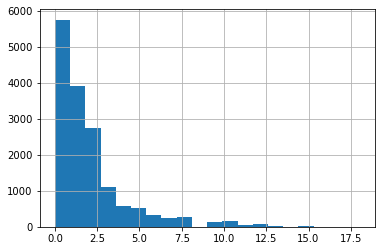

In [7]:

df['age_upon_outcome_(years)'].hist(bins=20)


In [8]:
df['age_upon_outcome_(years)'].unique()

array([16. , 17. , 15. , 11. , 12. , 13. ,  9. , 10. ,  7. ,  8. , 14. ,
        6. ,  5. ,  4. ,  3. ,  2. ,  1. ,  0.8,  0.9,  0.5,  0.7,  0.4,
        0.6,  0.2,  0.3,  0.1,  0. , 18. ])

In [9]:
#changing time_in_shelter_days to int
df['time_in_shelter_days'] = df['time_in_shelter_days'].astype(int)

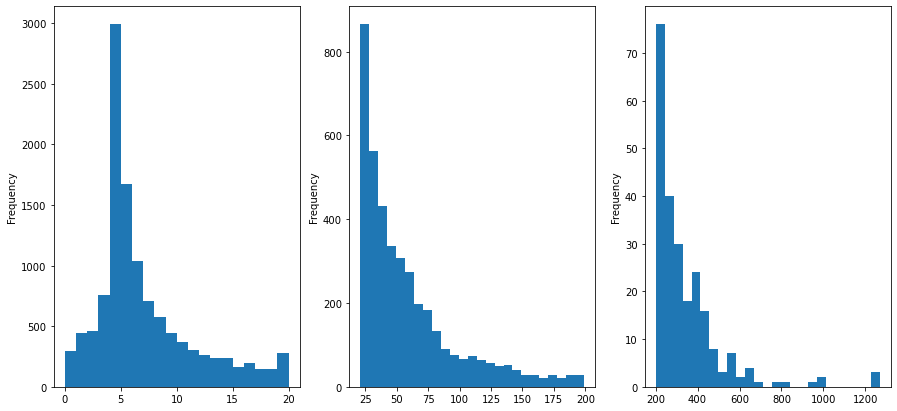

In [10]:
# histograms of time in shleter
time_most = df[df.loc[:,'time_in_shelter_days'] >=200 ]
time20 = df[df.loc[:,'time_in_shelter_days']<= 20 ]
time_mid = df[(df.loc[:, 'time_in_shelter_days']> 20) & (df.loc[:, 'time_in_shelter_days']<200)]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,7))
time20['time_in_shelter_days'].plot(ax=axes[0], kind='hist', bins=20)
time_mid['time_in_shelter_days'].plot(ax=axes[1], kind='hist', bins=25)
time_most['time_in_shelter_days'].plot(ax=axes[2], kind='hist', bins=25)


In [11]:
#most dogs spend less than a week in the shelter
print('Percentiles of time in shelter. \n 10th:{}, 50th: {}, 90th: {}'.format(df['time_in_shelter_days'].quantile(q=.10),
        df['time_in_shelter_days'].quantile(q=.50), df['time_in_shelter_days'].quantile(q=.90)))

Percentiles of time in shelter. 
 10th:3.0, 50th: 7.0, 90th: 61.0


In [12]:
#creating bins based on quantiles
labels = ['< 4 days', '4-7 days', '7-23 days', '<23 days']
df['time_in_shelter_binned'] = pd.qcut(df['time_in_shelter_days'], 4, labels=labels)

In [13]:
df['time_in_shelter_binned'].value_counts().sort_values()

4-7 days     3419
7-23 days    3726
<23 days     3912
< 4 days     4951
Name: time_in_shelter_binned, dtype: int64

In [14]:
#convert binned time in shelter to int (0-3) for modeling purposes
def create_dict(items): #creates dict {bin:num}
        return {v: i for i, v in enumerate(items, 0)}
time_binned_int = df['time_in_shelter_binned'].unique().tolist()
time = create_dict(time_binned_int)
df['time_binned_int']=df['time_in_shelter_binned'].map(create_dict(time))
df.head()

,Unnamed: 0,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,age_upon_intake_(years),intake_datetime,intake_monthyear,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,gender_Intact Female,gender_Intact Male,gender_Neutered Male,gender_Spayed Female,time_in_shelter_binned,time_binned_int
0,12,Adoption,A200922,16.0,2013-11-22 09:44:00,2013-11,Dog,16.0,2013-10-03 15:47:00,2013-10,...,0,1,0,0,0,0,1,0,<23 days,0
1,14,Adoption,A210457,17.0,2016-10-07 12:34:00,2016-10,Dog,17.0,2016-09-28 12:05:00,2016-09,...,0,0,1,0,0,0,1,0,7-23 days,1
2,22,Adoption,A226069,15.0,2015-10-29 15:00:00,2015-10,Dog,15.0,2015-10-06 12:29:00,2015-10,...,0,0,0,1,0,0,1,0,7-23 days,1
3,32,Adoption,A249087,15.0,2016-11-15 10:37:00,2016-11,Dog,15.0,2016-08-17 14:05:00,2016-08,...,0,0,0,1,0,0,0,1,<23 days,0
4,48,Adoption,A274546,11.0,2013-11-16 12:24:00,2013-11,Dog,11.0,2013-11-13 18:16:00,2013-11,...,0,0,0,1,0,0,0,1,< 4 days,2


In [15]:
#columns to be used as x, y will only be time_in_shelter_binned
l = list(df.columns)
c = df.columns[df.columns.str.startswith(('breed', 'color', 'gender', 'intake_type_', 'intake_cond_'))].to_list()
columns=['age_upon_outcome_(years)']+ c 

x_df = df[columns]

In [16]:
x = x_df
y = df[['time_in_shelter_binned']]
x.head()

,age_upon_outcome_(years),intake_cond_int,intake_type_int,breed_Anatol Shepherd,breed_Australian Cattle Dog,breed_Australian Kelpie,breed_Australian Shepherd,breed_Beagle,breed_Black Mouth Cur,breed_Border Collie,...,intake_cond_Pregnant,intake_cond_Sick,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,gender_Intact Female,gender_Intact Male,gender_Neutered Male,gender_Spayed Female
0,16.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,17.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,15.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,15.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,11.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [17]:
type(y)

pandas.core.frame.DataFrame

Split into train and test data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.3, random_state=1)

# Modeling
 KNN and Random Forest

In [19]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.metrics import confusion_matrix

train_scores = []
test_scores = []

for i in range(1, 10):  
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [20]:
print('train:',[round(x, 4) for x in train_scores])
print('test:',[round(x, 4) for x in test_scores])


train: [0.6364, 0.5432, 0.5606, 0.5517, 0.542, 0.5332, 0.5288, 0.5251, 0.5238]
test: [0.3771, 0.3456, 0.3852, 0.3783, 0.3966, 0.3977, 0.4022, 0.4006, 0.4018]


/home/amanda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/amanda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


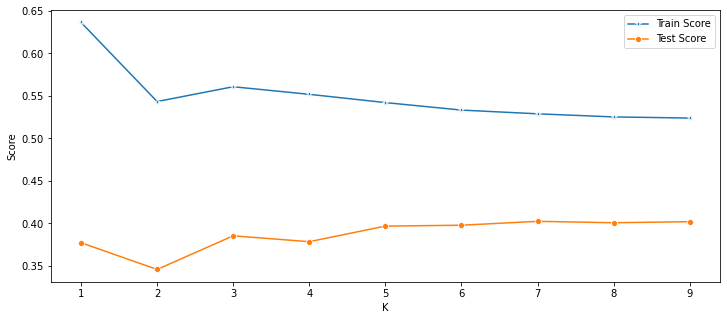

In [23]:
plt.figure(figsize=(12,5))
plt.xlabel('K')
plt.ylabel('Score')
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

In [22]:
#Grid search to find better k
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,100), 
              'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()

knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']})

In [24]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.4374832663989291
Best Parameters: {'n_neighbors': 78, 'weights': 'uniform'}


In [25]:
#score with confusion maxtrix
knn= KNeighborsClassifier(n_neighbors=78)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

y_pred = knn.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[230, 160, 509, 150],
       [152, 218, 361, 372],
       [190, 145, 977, 161],
       [ 86, 190, 257, 645]])

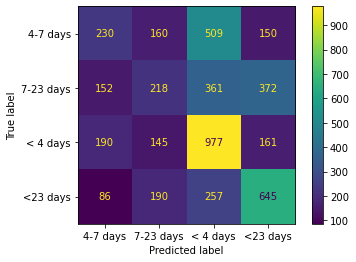

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test)

### Random Forest

In [27]:
#Random Forest gini
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier(criterion='gini' ,random_state=1)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

metrics.accuracy_score(y_test, y_pred)


0.42390172808661253

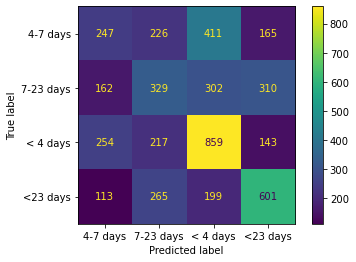

In [28]:
plot_confusion_matrix(clf, x_test, y_test)

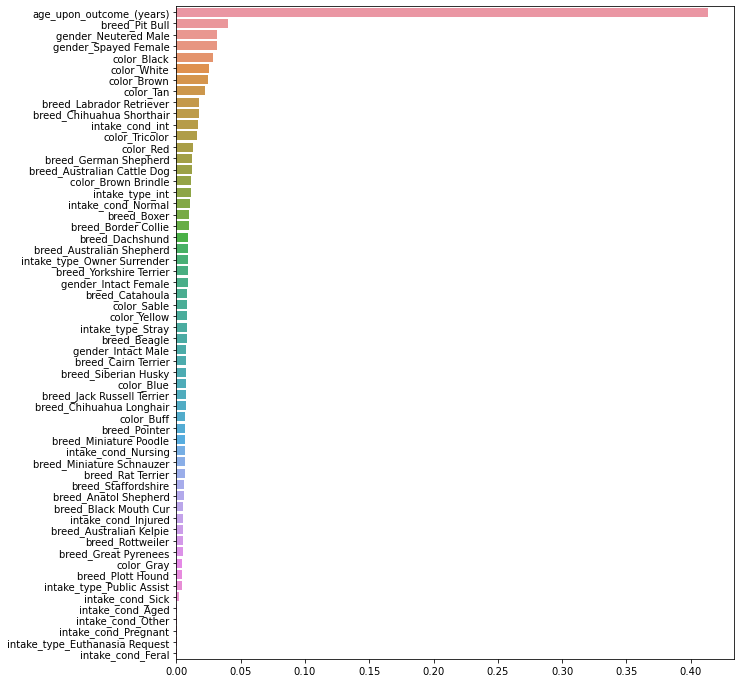

In [29]:
feature_imp = clf.feature_importances_
f = pd.Series(feature_imp,index=x_df.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x=f, y=f.index)

In [30]:
#Random Forest entropy
e_clf = RandomForestClassifier(criterion='entropy', random_state=1)
e_clf = e_clf.fit(x_train, y_train)

y_pred = e_clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)


0.42494274411825944

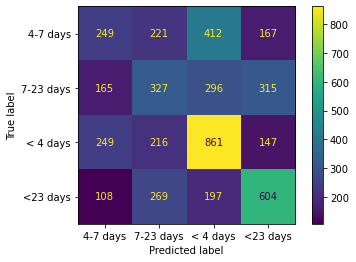

In [31]:
plot_confusion_matrix(e_clf, x_test, y_test)

## Random Forest without the color column

In [32]:
#rerunning random forest without certain varables 
#creating new train and test sets
#removing color improves the model the most
c = df.columns[df.columns.str.startswith(( 'breed','gender', 'intake_cond_', 'intake_type_'))].to_list()
columns=['age_upon_outcome_(years)']+ c 
columns
x2_df = df[columns]

x2 = x2_df
y2 = df[['time_in_shelter_binned']]


x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size =.3, random_state=42)

In [33]:
e_clf2 = RandomForestClassifier(criterion = 'entropy', random_state=1) #entropy performs slightly better
e_clf2 = e_clf2.fit(x2_train, y2_train)

y2_pred = e_clf2.predict(x2_test)
metrics.accuracy_score(y2_test, y2_pred)


0.4436810326879034

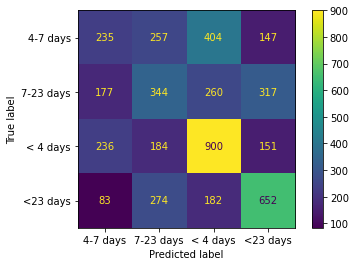

In [34]:
plot_confusion_matrix(e_clf2, x2_test, y2_test)

### Hyperparameter tuning and running

In [41]:
param_grid = {'n_estimators':np.arange(1,100), 
              'max_features' : ['auto', 'sqrt'],
              'max_depth' : np.arange(1,8),
              'criterion' : ['gini', 'entropy'],
              'bootstrap' : [True, False]}

rf_clf = RandomForestClassifier(random_state=1)

rf_grid = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)

In [42]:
rf_grid.fit(x_train, y_train)

rf_grid.best_params_


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 56}

In [43]:
print('train: ' , rf_grid.score(x_train, y_train))
print('test :', rf_grid.score(x_test, y_test))

train:  0.45827755466309683
test : 0.44034978138663333


In [44]:
#RF with tuned hyperparameters and all columns
clf = RandomForestClassifier(criterion='entropy', random_state=1, max_depth=6, n_estimators=32, bootstrap=True, max_features='auto')

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

metrics.accuracy_score(y_test, y_pred)


0.41994586716635435

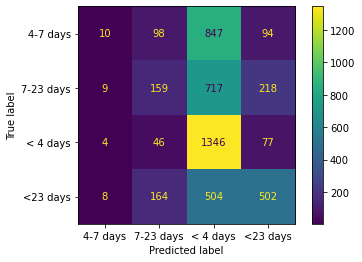

In [45]:
plot_confusion_matrix(clf, x_test, y_test)

This doesn't look great. It's mostly predicting less than four days 

### RF with non dummy variables

In [46]:
#running with encoded, non dummied variables

col = ['age_upon_outcome_(years)','intake_cond_int', 'intake_type_int', 'sex_upon_outcome_int', 'new_breed_int',
       'new_color_int']
x3_df = df[col]

x3 = x3_df
y3 = df[['time_in_shelter_binned']]


x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size =.3, random_state=42)

In [47]:
e_clf3 = RandomForestClassifier(criterion='gini', random_state=1)
e_clf3 = e_clf3.fit(x3_train, y3_train)

y3_pred = e_clf3.predict(x3_test)
metrics.accuracy_score(y3_test, y3_pred)


0.4243181344992713

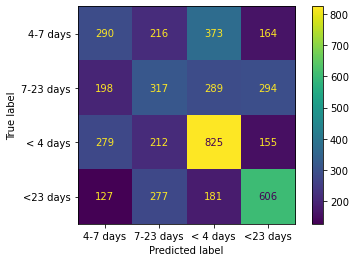

In [48]:
plot_confusion_matrix(e_clf3, x3_test, y3_test)

The non-dummy variables seems to even out the confusion matrix a bit. There are fewer dogs predicted to be at the shelter under 4 days.

### Logistic Regression

In [49]:
#encoding categories for logistic regression
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

x = x_df
y = df[['time_in_shelter_binned']]
y = le.fit_transform(y).reshape(-1, 1)
print(x.shape, y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.3, random_state=1) #resplit with encoded y

(16008, 58) (16008, 1)


In [50]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=1, multi_class='multinomial')
lg = lg.fit(x_train, y_train)

y_pred = lg.predict(x_test)
lg.score(x_test, y_test)

/home/amanda/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.43576931084738707

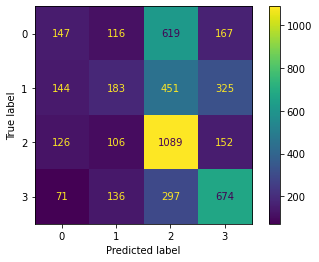

In [51]:
plot_confusion_matrix(lg, x_test, y_test)

## Conclusions
Random forest exluding color seems to produce the most accurate and balanced model (the model isn't just guessing <4 for most dogs). Hyperparameter tuning did increase the accuracy score, but created a more unbalanced confusion matrix. Overall KNN performed slightly worse than random forest no matter which features were included, and logistic regression was compareable to rf, but still very unbalanced. 